# Objective 
Analize Walmarts store-level sales from 2010 to 2012 to answer:
- Identify which stores consistently under or over perform
- Identify if there is a correlation between external factors (unemployment, temperature, price of fuel) and sales performance
- Identify the impact, if any, that holidays have on sales
- Identify trends in sales growth or recession over time

## Dataset Description

URL: https://www.kaggle.com/datasets/mikhail1681/walmart-sales  
Name: Walmart Sales  
Author: No author is listed however this is publically available data provided by Walmart between the years 2010 and 2012  
Purpose: The purpose of this dataset is to analyze market trends and the impact of external factors on weekly sales figures. These external factors include temperature, unemployement rates, fuel prices, whether it's a holiday or not, and CPI.  
Shape: The dataset consists of 6435 rows and 8 columns (6435, 8)  
Features:  
- Store (integer): The number of the store, effectively the store's ID  
- Date (object): The month, day, and year up to where the previous weeks sales were tracked  
- Weekly_Sales (float): The number of sales done at that store in the previous week from the date listed  
- Holiday_Flag (integer): A binary categorical indicator of if if the previous week featured a holiday. 1 means there was a holiday, 0 means there wasn't.  
- Temperature (float): The average temperature in fahrenheit of the previous week
- CPI (float): The average customer price index of the previous week.  
- Unemployment (float): Numerical representation of the average unemployment rate during the previous week
 


In [63]:
#Basic Visualization of first five rows

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import calendar

#Load Data
df = pd.read_csv('Walmart_Sales.csv')

#Exploration
print("Dataset Shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print('\nMissing values:')
print(df.isnull().sum())

#loading into SQLite

conn = sqlite3.connect('Walmart_Analysis.db')
df.to_sql('sales', conn, if_exists='replace', index=False)
print("\nData loaded")


Dataset Shape: (6435, 8)

Column names:
['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

First few rows:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    f

## Basic SQL Analysis

SQL provides a simple at a glance look at the dataset as a whole before diving into specifics with pandas.  
First we'll compare the total and average sales by store to locate high and low performers  
All sales numbers will be in millions of dollars for readability

In [53]:
#Total and average sales by store
query1 = """
SELECT Store, ROUND(SUM(Weekly_Sales)/1000000, 2) as Total_Sales_in_Millions, 
ROUND(AVG(Weekly_Sales)/1000000, 2) as Average_Weekly_Sales_in_Millions
FROM sales
GROUP BY Store
ORDER BY Store Asc
"""
result1 = pd.read_sql(query1, conn)
display(result1)

,Store,Total_Sales_in_Millions,Average_Weekly_Sales_in_Millions
0,1,222.40,1.56
1,2,275.38,1.93
2,3,57.59,0.40
3,4,299.54,2.09
4,5,45.48,0.32
5,6,223.76,1.56
6,7,81.60,0.57
7,8,129.95,0.91
8,9,77.79,0.54
9,10,271.62,1.90


Next we'll compare the average sales performance during and outside of holidays to determine the impact that holidays have on sales

In [54]:
#Average sales during holidays vs not during holidays
query2 = """
SELECT Holiday_Flag,
       ROUND(AVG(Weekly_Sales)/1000000, 2) as Avg_Sales_in_Millions,
       COUNT(*) as num_weeks
FROM sales
GROUP BY Holiday_Flag;
"""
result2 = pd.read_sql(query2, conn)
display(result2)


,Holiday_Flag,Avg_Sales_in_Millions,num_weeks
0,0,1.04,5985
1,1,1.12,450


Now we'll take a look at the sales trend over time by charting the total sales done in each week

In [62]:
#Sales trend over time
query3 = """
SELECT date, ROUND(SUM(Weekly_Sales)/1000000, 2) as Total_Sales_in_Millions
FROM sales
GROUP BY date
ORDER BY date;
"""
result3 = pd.read_sql(query3, conn)
display(result3)


,Date,Total_Sales_in_Millions
0,01-04-2011,43.46
1,01-06-2012,48.28
2,01-07-2011,47.58
3,01-10-2010,42.24
4,02-03-2012,46.86
...,...,...
138,30-07-2010,44.63
139,30-09-2011,42.20
140,30-12-2011,46.04
141,31-08-2012,47.16


Now we'll take a look if temperature has an impact on sales.  
Moderate temperature is the range between 40 and 70 degrees fahrenheit  
Cold temperature is below 40 and hot is above 70

In [ ]:
#Temperature impact on sales
query4 = """
SELECT
    CASE
        WHEN Temperature < 40 THEN 'Cold'
        WHEN Temperature < 70 THEN 'Moderate'
        ELSE 'Hot'
    END as Temp_Range,
    ROUND(AVG(Weekly_Sales)/1000000, 2) as Avg_Sales_in_Millions
FROM sales
GROUP BY Temp_Range;
"""
result4 = pd.read_sql(query4, conn)
display(result4)


,Temp_Range,Avg_Sales_in_Millions
0,Cold,1.08
1,Hot,1.01
2,Moderate,1.07


Finally we'll identify the top 5 performing stores during the holiday season

In [ ]:
#Top performing stores during holidays
query5 = """
SELECT store, ROUND(AVG(Weekly_Sales)/1000000, 2) as avg_holiday_sales_in_millions
FROM sales
WHERE Holiday_Flag = 1
GROUP BY store
ORDER BY avg_holiday_sales_in_millions DESC
LIMIT 5;
"""
result5 = pd.read_sql(query5, conn)
display(result5)


,Store,avg_holiday_sales_in_millions
0,20,2.25
1,4,2.24
2,14,2.12
3,13,2.11
4,10,2.11


## Takeaways

- Comparing sales from the beginning of the dataset to the end shows that there has been no significant growth or decline in sales over this three year period

- Holidays provide a rough boost of 100,000 sales per week, since the average store does ~1 million sales per week the holidays provide a 10% boost in sales. 

- Heat is detremental to sales, providing an average drop in 60,000 sales compared to moderate temperature, compared to the cold, which provides an average benefit of 10,000 sales. However this could be a biproduct of the holidays centralizing in the winter (Christmas, Valentines, New Years) and spring (St. Patricks Day) rather than the summer

## Deeper Analysis

Now that we have a general understanding of the dataset we'll use pandas to come to come to analyze it deeper.  
First we'll look at the concrete impact that holidays have on average weekly sales, calculating the mean, median, and standard deviation of sales within those periods

In [64]:

df = pd.read_sql("SELECT * FROM sales", conn)

#Converting date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

#Impact of Holidays on Sales

holiday_comparison = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(mean='mean', median='median', std='std')
print("\nHoliday vs Non-Holiday Sales:")
print(holiday_comparison)



Holiday vs Non-Holiday Sales:
                      mean      median            std
Holiday_Flag                                         
0             1.041256e+06   956211.20  558957.436147
1             1.122888e+06  1018538.04  627684.931884


Next we'll look at the growth of sales (as a percentage) compared to the previous year to see if our intuition from the quick look at the SQL tables was correct 

In [72]:
#Growth Factor by Year

yearly_sales = df.groupby(df['Date'].dt.year)['Weekly_Sales'].sum().round(2)
yoy_growth = (yearly_sales.pct_change() * 100).round(2)
print('\nYear-Over-Year Growth:')
print(yoy_growth)



Year-Over-Year Growth:
Date
2010      NaN
2011     6.96
2012   -18.30
Name: Weekly_Sales, dtype: float64


We'll now analyze seasonal trends in sales figures.  
We'll do this by creating a bar chart of the average weekly sales (in millions) across every store during each month of the year  
This will make it easy to visualize which months are high and low performers

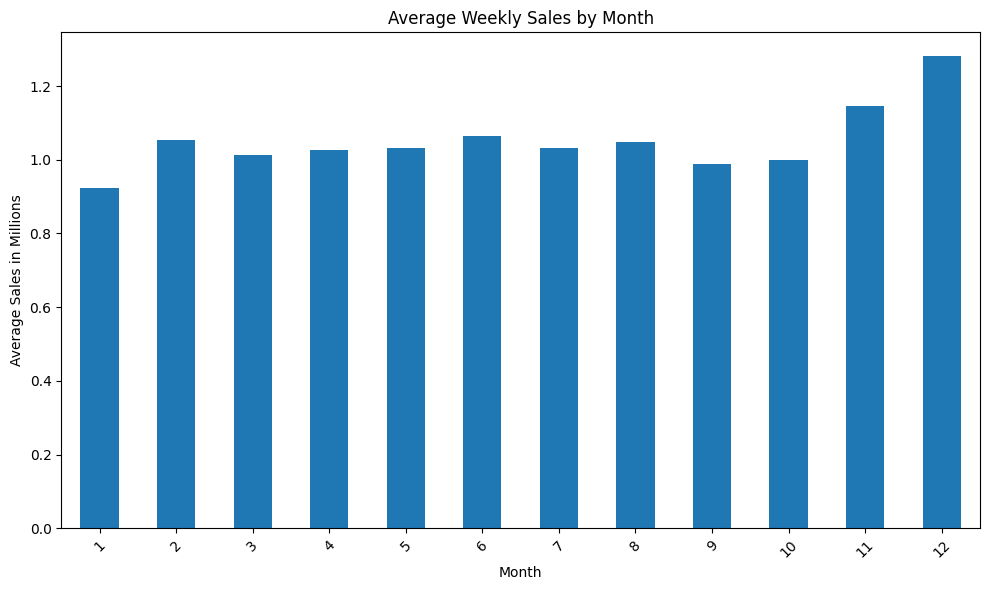

In [68]:
#Analysing Seasonal Trends

monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().sort_index()

# Scale Sales to Millions for Readability

monthly_sales_millions = monthly_sales / 1_000_000

plt.figure(figsize=(10,6))
ax = monthly_sales_millions.plot(kind='bar')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales in Millions')

#Convert to Month Names
month_names = [calendar.month_abbr[i] for i in monthly_sales.index]
ax.set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.savefig('monthly_trends.png')

Now we'll dive deeper into individual store performance.  
First we'll categorize the top and bottom 5 performing stores to identify each end of the sales spectrum. We'll look at the total sales (sum), mean, and standard deivation of their weekly sales.  
From this raw data we'll then create a bar chart of their total sales (in millions) to make it easier to visualize the difference in performance.


Top 5 Stores by Total Sales:
                sum          mean            std
Store                                           
20     3.013978e+08  2.107677e+06  275900.562742
4      2.995440e+08  2.094713e+06  266201.442297
14     2.889999e+08  2.020978e+06  317569.949476
13     2.865177e+08  2.003620e+06  265506.995776
2      2.753824e+08  1.925751e+06  237683.694682

Bottom 5 Stores by Total Sales
               sum           mean           std
Store                                          
38     55159626.42  385731.653287  42768.169450
36     53412214.97  373511.992797  60725.173579
5      45475688.90  318011.810490  37737.965745
44     43293087.84  302748.866014  24762.832015
33     37160221.96  259861.692028  24132.927322


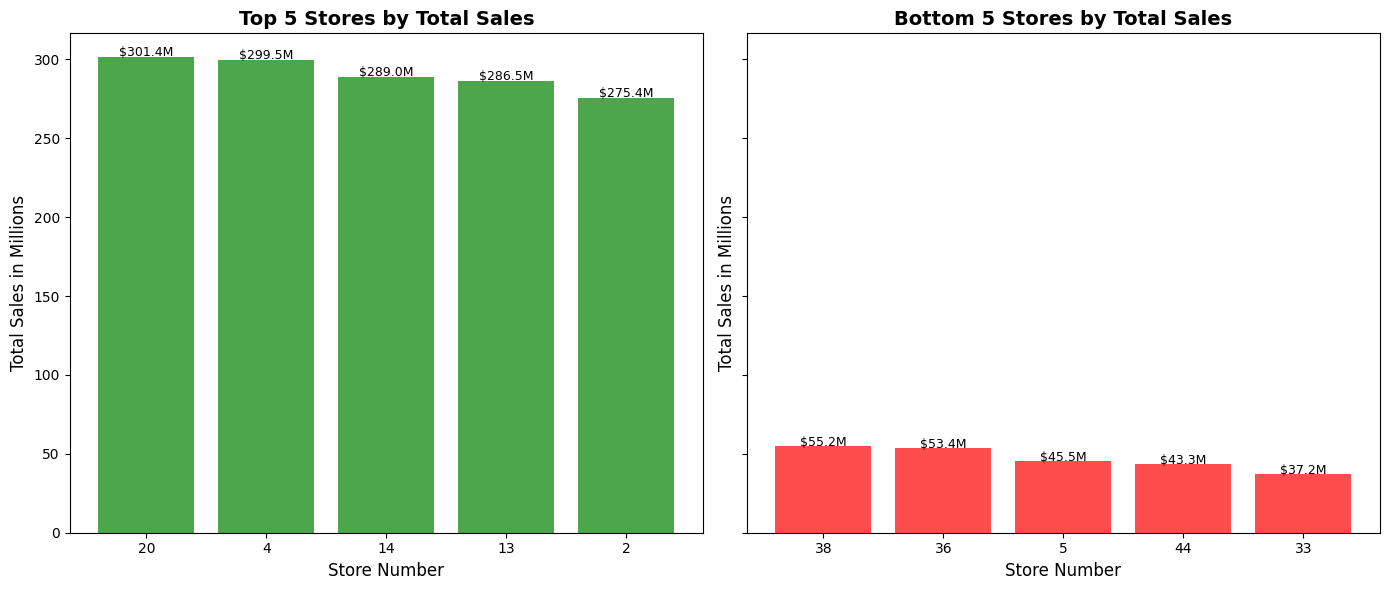

In [69]:
#Performance by Store
store_performance = df.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean', 'std'])
store_performance = store_performance.sort_values('sum', ascending=False)

#Top/Bottom 5 Stores by Performance 

top_stores = store_performance.head(5)
bottom_stores = store_performance.tail(5)

print('\nTop 5 Stores by Total Sales:')
print(top_stores)
print('\nBottom 5 Stores by Total Sales')
print(bottom_stores)

#Visualization 

top_sales_millions = top_stores['sum']/1_000_000
bottom_sales_millions = bottom_stores['sum']/1_000_000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)
#Top 5 Stores
ax1.bar(range(len(top_sales_millions)), top_sales_millions, color='green', alpha=0.7)
ax1.set_title('Top 5 Stores by Total Sales', fontsize=14, fontweight='bold')
ax1.set_xlabel('Store Number', fontsize=12)
ax1.set_ylabel('Total Sales in Millions', fontsize=12)
ax1.set_xticks(range(len(top_sales_millions)))
ax1.set_xticklabels(top_stores.index)

for i, v in enumerate(top_sales_millions):
    ax1.text(i, v + 0.5, f'${v:.1f}M', ha='center', fontsize=9)

#Bottom 5 Stores

ax2.bar(range(len(bottom_sales_millions)), bottom_sales_millions, color='red', alpha=0.7)
ax2.set_title('Bottom 5 Stores by Total Sales', fontsize=14, fontweight='bold')
ax2.set_xlabel('Store Number', fontsize=12)
ax2.set_ylabel('Total Sales in Millions', fontsize=12)
ax2.set_xticks(range(len(bottom_sales_millions)))
ax2.set_xticklabels(bottom_stores.index)

for i, v in enumerate(bottom_sales_millions):
    ax2.text(i, v + 0.05, f'${v:.1f}M', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('top_bottom_stores.png', dpi=300, bbox_inches='tight')
plt.show()

Finally, we'll take a look at the correlation between external factors, such as unemployment, fuel prices, temperature, and CPI, and weekly sales  
We'll do this through a correlation heatmap. Positive numbers closer to 1 mean strong correlation to sales, negative numbers mean they are oppositely correlated. 

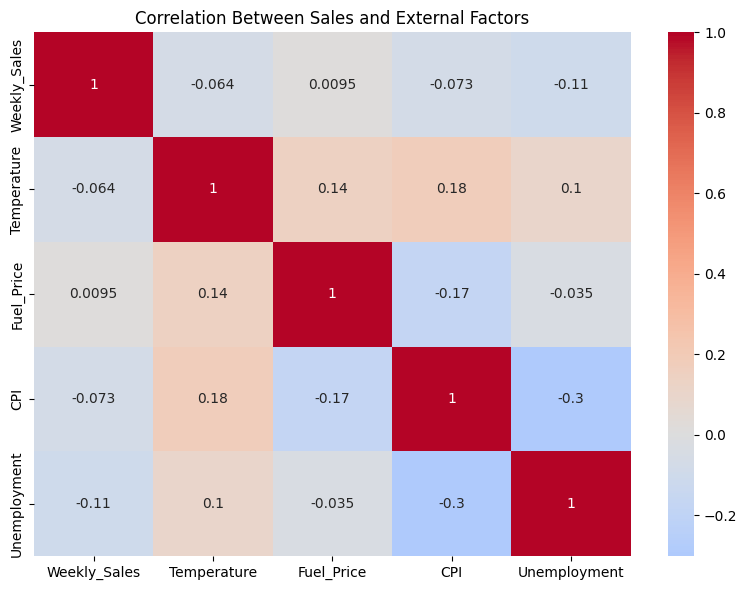

In [67]:
#Correlation Between Sales and External Factors
correlation_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='coolwarm', center=0)
plt.title('Correlation Between Sales and External Factors')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

## Takeaways

- Sales are relatively consistent throughout the year with peaks in Feburary, June, August, November, and December. The key outlier is in January which has significantly lower weekly sales than any other month. 

- This is within expectations, we can see that there is a strong correlation between holidays and an increase in sales and the months which show an uptick in sales are known for significant holidays (Valentines Day, Christmas, Summer Vacation).

- The low sales in Janurary are also within expectations. November and December have the highest weekly sales in the entire year and January does not feature any significant holidays other than New Years Day, which would only increase December sales. 

- There's currently a 8.1x difference between the top performing store and the bottom performing store which is extremely significant.  This is an indication that case by case factors, such as store location or size, lead store performance. 

- This is corroborated by the correlation heatmap which shows that weekly sales are not significantly impacted by uncontrollable external factors such as fuel prices and temperature. Unemployment, while still weak, is the lead cause for lower sales across the board. 

- From this, it would be safe to conclude that stores struggling to perform may be located in areas with a higher rate of unemployment in their population which therefore leads to a lower number of sales.

- Given the generally low correlation, segmentation may prove to be more efficient than global forecasting to obtain a better grasp of the root of the problem. 

## Importing to Excel

We'll finish by importing this data into Excel for easier viewing  
This will include:  
- An executive summary with a table featuring total sales (in millions of dollars), average weekly sales, number of stores, the date range of the database, average holiday sales lift, and key insights  
- A table of store by store performance ordered from top performers to bottom. This includes total and average weekly sales and the standard deviation of their sales per week  
- A sheet detailing month by month performance with total sales and average sales per store
- An analysis of the impact of holidays on sales performance including average and median sales during and outside of hoidays as well as the top 5 performing stores 
- An analysis of the impact of external factors on sales performance 
- The growth factor of sales compared to the previous year 
- All of the raw data featured in the dataset

In [ ]:
import pandas as pd
import sqlite3
from datetime import datetime

# Connect to database
conn = sqlite3.connect('Walmart_Analysis.db')
df = pd.read_sql("SELECT * FROM sales", conn)

# Convert to datetime and scale
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Weekly_Sales_Millions'] = df['Weekly_Sales'] / 1_000_000

# Prepare summary tables
# KPIs
total_sales = df['Weekly_Sales_Millions'].sum()
avg_weekly_sales = df['Weekly_Sales_Millions'].mean()
num_stores = df['Store'].nunique()
date_range_start = df['Date'].min().strftime('%m/%d/%Y')
date_range_end = df['Date'].max().strftime('%m/%d/%Y')

# Holiday lift calculation
holiday_avg = df[df['Holiday_Flag'] == 1]['Weekly_Sales_Millions'].mean()
non_holiday_avg = df[df['Holiday_Flag'] == 0]['Weekly_Sales_Millions'].mean()
holiday_lift = ((holiday_avg - non_holiday_avg) / non_holiday_avg * 100)

kpis = pd.DataFrame({
    'Metric': ['Total Sales (Millions)', 'Average Weekly Sales (Millions)', 
               'Number of Stores', 'Date Range', 'Holiday Sales Lift (%)'],
    'Value': [f'${total_sales:.2f}M', f'${avg_weekly_sales:.2f}M', 
              num_stores, f'{date_range_start} - {date_range_end}', f'+{holiday_lift:.1f}%']
})

# Store performance
store_performance = df.groupby('Store')['Weekly_Sales_Millions'].agg(['sum', 'mean', 'std']).round(2)
store_performance.columns = ['Total_Sales_M', 'Avg_Weekly_Sales_M', 'Std_Dev']
store_performance = store_performance.sort_values('Total_Sales_M', ascending=False)
store_performance['Rank'] = range(1, len(store_performance) + 1)

# Monthly summary
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('YearMonth')['Weekly_Sales_Millions'].agg(['sum', 'mean', 'count']).round(2)
monthly_summary.columns = ['Total_Sales_M', 'Avg_Sales_M', 'Num_Weeks']
monthly_summary.index = monthly_summary.index.strftime('%Y-%m')

# Holiday analysis
holiday_comparison = df.groupby('Holiday_Flag')['Weekly_Sales_Millions'].agg(['mean', 'median', 'count']).round(2)
holiday_comparison.columns = ['Avg_Sales_M', 'Median_Sales_M', 'Num_Weeks']
holiday_comparison.index = ['Non-Holiday', 'Holiday']

# Top/Bottom stores
top_5_stores = store_performance.head(5)[['Total_Sales_M', 'Avg_Weekly_Sales_M', 'Rank']]
bottom_5_stores = store_performance.tail(5)[['Total_Sales_M', 'Avg_Weekly_Sales_M', 'Rank']]

# Temperature impact
df['Temp_Range'] = pd.cut(df['Temperature'], bins=[0, 40, 70, 120], labels=['Cold', 'Moderate', 'Hot'])
temp_impact = df.groupby('Temp_Range')['Weekly_Sales_Millions'].mean().round(2)

# Year-over-year growth
yearly_sales = df.groupby(df['Date'].dt.year)['Weekly_Sales_Millions'].sum().round(2)
yoy_growth = yearly_sales.pct_change() * 100

# Correlation matrix
correlation_cols = ['Weekly_Sales_Millions', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df[correlation_cols].corr().round(3)

# Export to Excel with multiple sheets
with pd.ExcelWriter('walmart_analysis_dashboard.xlsx', engine='xlsxwriter') as writer:
    workbook = writer.book
    
    # Define formats
    header_format = workbook.add_format({
        'bold': True,
        'bg_color': '#4472C4',
        'font_color': 'white',
        'border': 1
    })
    
    money_format = workbook.add_format({'num_format': '$#,##0.00'})
    percent_format = workbook.add_format({'num_format': '0.0%'})
    
    # Sheet 1: Executive Summary
    kpis.to_excel(writer, sheet_name='Executive Summary', index=False, startrow=0)
    
    # Add spacing and then key insights
    insights_row = len(kpis) + 3
    worksheet = writer.sheets['Executive Summary']
    worksheet.write(insights_row, 0, 'Key Insights:', header_format)
    worksheet.write(insights_row + 1, 0, f'• Holiday weeks show {holiday_lift:.1f}% higher average sales')
    worksheet.write(insights_row + 2, 0, f'• Store {store_performance.index[0]} leads with ${store_performance.iloc[0]["Total_Sales_M"]:.2f}M total sales')
    worksheet.write(insights_row + 3, 0, f'• Bottom 5 stores average ${bottom_5_stores["Total_Sales_M"].mean():.2f}M vs ${top_5_stores["Total_Sales_M"].mean():.2f}M for top 5')
    
    # Sheet 2: Store Performance
    store_performance.to_excel(writer, sheet_name='Store Performance')
    worksheet2 = writer.sheets['Store Performance']
    
    # Add conditional formatting for Total Sales
    worksheet2.conditional_format(1, 1, len(store_performance), 1, {
        'type': '3_color_scale',
        'min_color': '#F8696B',
        'mid_color': '#FFEB84',
        'max_color': '#63BE7B'
    })
    
    # Sheet 3: Monthly Trends
    monthly_summary.to_excel(writer, sheet_name='Monthly Trends')
    
    # Sheet 4: Holiday Analysis
    holiday_comparison.to_excel(writer, sheet_name='Holiday Analysis')
    top_5_stores.to_excel(writer, sheet_name='Holiday Analysis', startrow=len(holiday_comparison) + 3)
    
    # Sheet 5: External Factors
    temp_impact.to_excel(writer, sheet_name='External Factors')
    correlation_matrix.to_excel(writer, sheet_name='External Factors', startrow=len(temp_impact) + 3)
    
    # Sheet 6: Year-over-Year
    yearly_sales.to_excel(writer, sheet_name='YoY Growth')
    yoy_growth.to_excel(writer, sheet_name='YoY Growth', startcol=3)
    
    # Sheet 7: Raw Data
    df[['Store', 'Date', 'Weekly_Sales_Millions', 'Holiday_Flag', 'Temperature', 
        'Fuel_Price', 'CPI', 'Unemployment']].to_excel(writer, sheet_name='Raw Data', index=False)

print("Excel dashboard created: walmart_analysis_dashboard.xlsx")
conn.close()

C:\Users\Ben\AppData\Local\Temp\ipykernel_27324\592393742.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_impact = df.groupby('Temp_Range')['Weekly_Sales_Millions'].mean().round(2)


Excel dashboard created: walmart_analysis_dashboard.xlsx
